In [ ]:
pip install mlxtend

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

C:\Users\moham\AppData\Local\Temp\ipykernel_20916\2473352509.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
start_all=time.time()

#CICIOTdataset

In [6]:
s=time.time()
dataset=pd.read_csv('G:\dataset_ciciot_LOWSAMPLE.csv')
e=time.time()
sf_time= e-s
sf_time

271.0257246494293

In [7]:
dataset

,Unnamed: 0.1,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,class_label
0,0,0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,...,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,DDoS
1,1,1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,...,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood,DoS
2,2,2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,...,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,DDoS
3,3,3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,...,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood,DoS
4,4,4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,...,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686574,46686574,234740,0.000000,54.00,6.00,64.00,25.224003,25.224003,0.0,0.0,...,54.00,8.307636e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood,DDoS
46686575,46686575,234741,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,...,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,DDoS
46686576,46686576,234742,4.274490,107.85,6.00,64.00,0.463217,0.463217,0.0,0.0,...,54.39,8.294658e+07,9.5,10.396218,0.246316,1.516787,0.02,141.55,DoS-TCP_Flood,DoS
46686577,46686577,234743,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,...,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood,DDoS


C:\Users\moham\AppData\Local\Temp\ipykernel_20916\2376274274.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_label',


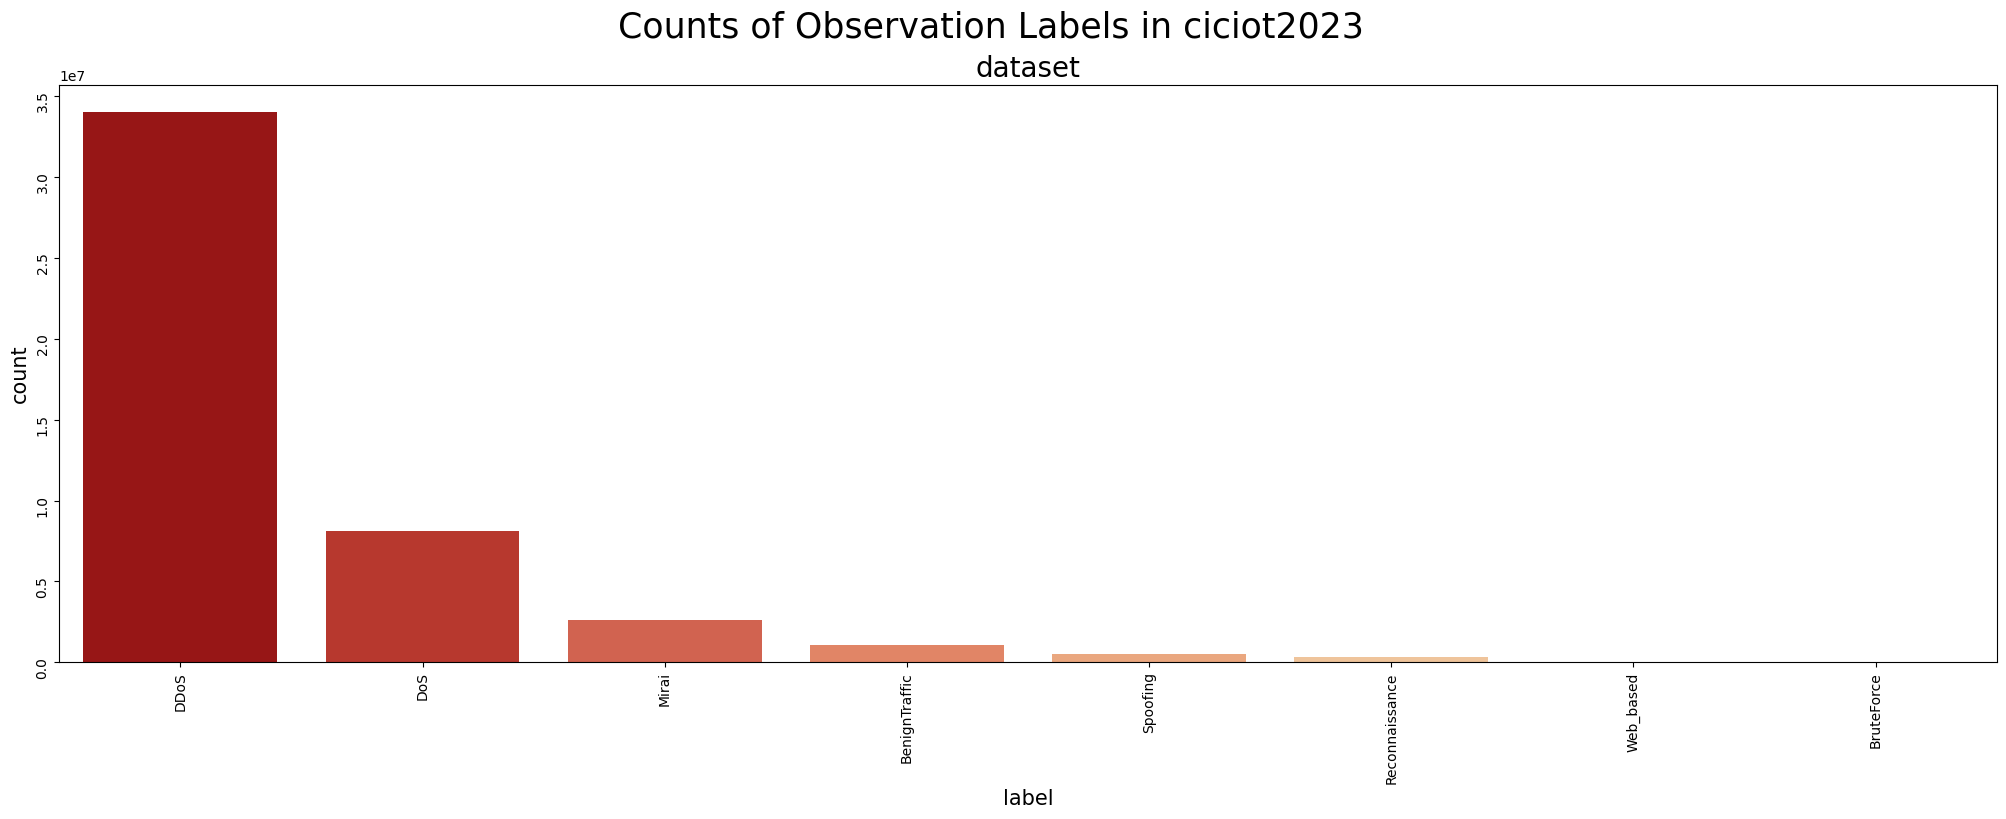

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,(ax)= plt.subplots(ncols=1, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels in ciciot2023 ', fontsize=25)

sns.countplot(x='class_label',
            palette="OrRd_r",
            data=dataset,
            order=dataset['class_label'].value_counts().index,
            ax=ax)

ax.set_title('dataset', fontsize=20)
ax.set_xlabel('label', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.tick_params(labelrotation=90)

plt.show()

##check & fill miss value

In [9]:
dataset.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight       

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686579 entries, 0 to 46686578
Data columns (total 50 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0.1     int64  
 1   Unnamed: 0       int64  
 2   flow_duration    float64
 3   Header_Length    float64
 4   Protocol Type    float64
 5   Duration         float64
 6   Rate             float64
 7   Srate            float64
 8   Drate            float64
 9   fin_flag_number  float64
 10  syn_flag_number  float64
 11  rst_flag_number  float64
 12  psh_flag_number  float64
 13  ack_flag_number  float64
 14  ece_flag_number  float64
 15  cwr_flag_number  float64
 16  ack_count        float64
 17  syn_count        float64
 18  fin_count        float64
 19  urg_count        float64
 20  rst_count        float64
 21  HTTP             float64
 22  HTTPS            float64
 23  DNS              float64
 24  Telnet           float64
 25  SMTP             float64
 26  SSH              float64
 27  IRC       

In [11]:
dataset.nunique()

Unnamed: 0.1       46686579
Unnamed: 0           451498
flow_duration      19377786
Header_Length       3908880
Protocol Type          9358
Duration              24047
Rate               23810821
Srate              23810821
Drate                  2941
fin_flag_number           2
syn_flag_number           2
rst_flag_number           2
psh_flag_number           2
ack_flag_number           2
ece_flag_number           2
cwr_flag_number           2
ack_count              1048
syn_count              3780
fin_count              2000
urg_count             51822
rst_count            113649
HTTP                      2
HTTPS                     2
DNS                       2
Telnet                    2
SMTP                      2
SSH                       2
IRC                       2
TCP                       2
UDP                       2
DHCP                      2
ARP                       2
ICMP                      2
IPv                       2
LLC                       2
Tot sum             

##remove redandant feature

In [12]:
dataset=dataset.drop(['label','Unnamed: 0'],axis=1)
#dataset=dataset.drop(['Unnamed: 0 '],axis=1)

In [13]:
dataset.shape

(46686579, 48)

In [14]:
dataset

MemoryError: Unable to allocate 3.13 GiB for an array with shape (9, 46686579) and data type float64

MemoryError: Unable to allocate 3.13 GiB for an array with shape (9, 46686579) and data type float64

In [16]:
dataset= dataset.sample(frac = 1)

MemoryError: Unable to allocate 16.0 GiB for an array with shape (46, 46686579) and data type float64

##split data to X AND Y

In [ ]:
y=dataset['class_label']
X=dataset.iloc[:,0:-1]
X

In [ ]:
X.shape ,y.shape

In [ ]:
X.info()

In [ ]:
y

##Encode categurial features & scale

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler , StandardScaler
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
# MMS = MinMaxScaler()
MMS = StandardScaler()
#Encoder=OneHotEncoder(handle_unknown = 'ignore')

In [ ]:
#cat_X= X.select_dtypes(include='object').columns
num_X= X.select_dtypes(include='float').columns

In [ ]:
preprocessing = ColumnTransformer(
    [("MM", MMS, num_X)]
         )

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_org=le.fit_transform(y)

In [ ]:
y_org

##creat deffrent  target variabel

In [ ]:
y_normal = y.apply(lambda x: 1 if x == 'BenignTraffic' else 0)
y_dos = y.apply(lambda x: 1 if x == 'DoS' else 0)
y_ddos = y.apply(lambda x: 1 if x == 'DDoS' else 0)
y_Mirai = y.apply(lambda x: 1 if x == 'Mirai' else 0)
y_Reconnaissance= y.apply(lambda x: 1 if x == 'Reconnaissance' else 0)
y_Web_based= y.apply(lambda x: 1 if x == 'Web_based' else 0)
y_BruteForce= y.apply(lambda x: 1 if x == 'BruteForce' else 0)
y_Spoofing= y.apply(lambda x: 1 if x == 'Spoofing' else 0)
# y_paper=y.apply(lambda x: 1 if x!= 'Normal' else 0)

In [ ]:
print(y_dos.value_counts())
print(y_ddos.value_counts())
print( y_normal.value_counts())
print(y_Mirai.value_counts())
print(y_Reconnaissance.value_counts())
print(y_Web_based.value_counts())
print(y_BruteForce.value_counts())
print(y_Spoofing.value_counts())
# print(y_paper.value_counts())

In [ ]:
print(X.shape , y.shape)

In [ ]:
X.info()

##split data to test & train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train ,X_test, y_train, y_test =train_test_split(X,y_org,test_size=0.3,shuffle=True,random_state=44)
X_train_p, X_test_p , y_train_p , y_test_p =train_test_split(X,y_org,test_size=0.3,shuffle=True,random_state=44)
X_train_n ,X_test_n, y_train_n, y_test_n =train_test_split(X,y_normal,test_size=0.3,shuffle=True,random_state=44)
X_train_dos ,X_test_dos, y_train_dos, y_test_dos =train_test_split(X,y_dos,test_size=0.3,shuffle=True,random_state=44)
X_train_ddos ,X_test_ddos, y_train_ddos, y_test_ddos =train_test_split(X,y_ddos,test_size=0.3,shuffle=True,random_state=44)
X_train_Mirai ,X_test_Mirai, y_train_Mirai, y_test_Mirai =train_test_split(X,y_Mirai,test_size=0.3,shuffle=True,random_state=44)
X_train_reconn ,X_test_reconn, y_train_reconn, y_test_reconn =train_test_split(X,y_Reconnaissance,test_size=0.3,shuffle=True,random_state=44)
X_train_Web_based ,X_test_Web_based, y_train_Web_based, y_test_Web_based =train_test_split(X,y_Web_based,test_size=0.3,shuffle=True,random_state=44)
X_train_BruteForce ,X_test_BruteForce, y_train_BruteForce, y_test_BruteForce =train_test_split(X,y_BruteForce,test_size=0.3,shuffle=True,random_state=44)
X_train_Spoofing ,X_test_Spoofing, y_train_Spoofing, y_test_Spoofing =train_test_split(X,y_Spoofing,test_size=0.3,shuffle=True,random_state=44)

In [ ]:
print(X_train_reconn.shape , y_train_reconn.shape , X_test_reconn.shape ,  y_test_reconn.shape)

In [ ]:
print(X_train_n.shape , y_train_n.shape , X_test_n.shape ,  y_test_n.shape)

In [ ]:
print(X_train_p.shape, X_test_p.shape, y_train_p.shape, y_test_p.shape)

#feature selection using gini and Information Gain and RFE metric

##gini & rfe & IG

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

###test

In [ ]:
# from sklearn.pipeline import Pipeline
# rf_model_n = RandomForestClassifier()
# gini_pipe_n= Pipeline(steps=[
#      ('preprocessing' ,preprocessing),
#      ('rf',rf_model_n )])
# Selected_indices= None
# for i in range (3):
#   gini_pipe_n.fit(X_train_n,y_train_n)

#   feature_selection=gini_pipe_n.named_steps['preprocessing']
#   feature_importances= gini_pipe_n.named_steps['rf'].feature_importances_
#   current_indices= feature_importances.argsort()[-5:][::-1]
#   if Selected_indices is None:
#     Selected_indices= current_indices
#   else:
#     Selected_indices= list(set(Selected_indices) & set(current_indices))

# selected_features=X_train_n.columns[Selected_indices]
# print(selected_features)


##papaer method

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_paper = RandomForestClassifier()
gini_pipe_p= Pipeline(steps=[
     ('preprocessing' ,preprocessing),
     ('rf',rf_model_paper )])

gini_pipe_p.fit(X_train_p,y_train_p)

In [ ]:
gini_pipe_p[-1]

In [ ]:
feat_importances_p = pd.Series(gini_pipe_p[-1].feature_importances_)
df_imp_feat_p= feat_importances_p.nlargest(23)
print(rf_model_paper.feature_importances_)


df_imp_feat_p.plot(kind='barh')
plt.show()
print(df_imp_feat_p)

In [ ]:
df_imp_feat_p.index

###IG

In [ ]:
MI=SelectKBest(score_func=mutual_info_classif, k=23)

In [ ]:
MI_pipe=Pipeline([('preprocessing',preprocessing),
                 ('MI',MI)])

In [ ]:
X_train_MI_P=MI_pipe.fit_transform(X_train_p,y_train_p)
X_test_MI_P=MI_pipe.transform(X_test_p)
IG_P=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_P.scores_)):
	print('Feature %d: %f' % (i,IG_P.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_P.scores_))], IG_P.scores_)
pyplot.show()

In [ ]:
# IG_n.get_feature_names_out()

IG_features_P=pd.DataFrame(IG_P.get_feature_names_out())
IG_features_P=IG_features_P.iloc[:,0].str.replace('x','')
IG_features_P=pd.to_numeric(IG_features_P)

In [ ]:
IG_features_P

###intersect paper

In [ ]:
def intersect(lst1,lst2):
   return list(set(lst1) & set(lst2) )

In [ ]:
int_gini_IG_p=intersect(IG_features_P,df_imp_feat_p.index)
print(int_gini_IG_p , len(int_gini_IG_p))

###union paper

In [ ]:
def union(lst1,lst2):
  return list(set(lst1) | set(lst2))

In [ ]:
un_gini_IG_p=union(IG_features_P,df_imp_feat_p.index)
print(un_gini_IG_p, len(un_gini_IG_p))

##Normal class


###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_n = RandomForestClassifier()
gini_pipe= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_n )])

gini_pipe.fit(X_train_n,y_train_n)

In [ ]:
gini_pipe[-1]

In [ ]:
gini_pipe[-1].feature_importances_.shape

In [ ]:
X_train.shape

In [ ]:
X_train

In [ ]:
feat_importances_n = pd.Series(gini_pipe[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_n= feat_importances_n.nlargest(5)
print(rf_model_n.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_n.plot(kind='barh')
plt.show()
print(df_imp_feat_n)

In [ ]:
df_imp_feat_n.index

###IG

In [ ]:
MI=SelectKBest(score_func=mutual_info_classif, k=5)
MI_pipe=Pipeline([('preprocessing',preprocessing),
                 ('MI',MI)])

In [ ]:
X_train_MI_n=MI_pipe.fit_transform(X_train_n,y_train_n)
X_test_MI_n=MI_pipe.transform(X_test_n)
IG_n=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_n.scores_)):
	print('Feature %d: %f' % (i,IG_n.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_n.scores_))], IG_n.scores_)
pyplot.show()

In [ ]:
# IG_n.get_feature_names_out()

IG_features_n=pd.DataFrame(IG_n.get_feature_names_out())
IG_features_n=IG_features_n.iloc[:,0].str.replace('x','')
IG_features_n=pd.to_numeric(IG_features_n)

In [ ]:
IG_features_n

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe.fit(X_train_n, y_train_n)
rfe_pipe[-1].support_
rfe_normal_features=rfe_pipe[-1].get_feature_names_out()
rfe_normal_features=pd.DataFrame(rfe_normal_features)
rfe_normal_features=rfe_normal_features.iloc[:,0].str.replace('x','')
rfe_normal_features=pd.to_numeric(rfe_normal_features)

In [ ]:
rfe_normal_features

###intersect for normal class

In [ ]:
int_rfe_gini_normal=intersect(df_imp_feat_n.index,rfe_normal_features)

In [ ]:
int_rfe_gini_normal

In [ ]:
int_rfe_IG_normal=intersect(rfe_normal_features,IG_features_n)

In [ ]:
int_rfe_IG_normal

###union for normal class

In [ ]:
un_rfe_gini_normal=union(rfe_normal_features,df_imp_feat_n.index)

In [ ]:
un_rfe_gini_normal

In [ ]:
un_rfe_IG_normal=union(rfe_normal_features,IG_features_n)

In [ ]:
un_rfe_IG_normal

##DoS class

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_dos = RandomForestClassifier()
gini_pipe_dos= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_dos )])

gini_pipe_dos.fit(X_train_dos,y_train_dos)

In [ ]:
feat_importances_dos= pd.Series(gini_pipe_dos[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_dos= feat_importances_dos.nlargest(5)
print(rf_model_dos.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_dos.plot(kind='barh')
plt.show()
print(df_imp_feat_dos)

In [ ]:
df_imp_feat_dos.index

###IG

In [ ]:
X_train_MI_dos=MI_pipe.fit_transform(X_train_dos,y_train_dos)
X_test_MI_dos=MI_pipe.transform(X_test_dos)
IG_dos=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_dos.scores_)):
	print('Feature %d: %f' % (i,IG_dos.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_dos.scores_))], IG_dos.scores_)
pyplot.show()

In [ ]:
IG_features_dos=pd.DataFrame(IG_dos.get_feature_names_out())
IG_features_dos=IG_features_dos.iloc[:,0].str.replace('x','')
IG_features_dos=pd.to_numeric(IG_features_dos)

In [ ]:
IG_features_dos

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe_dos= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe_dos.fit(X_train_dos, y_train_dos)
rfe_pipe_dos[-1].support_
rfe_dos_features=rfe_pipe_dos[-1].get_feature_names_out()
rfe_dos_features=pd.DataFrame(rfe_dos_features)
rfe_dos_features=rfe_dos_features.iloc[:,0].str.replace('x','')
rfe_dos_features=pd.to_numeric(rfe_dos_features)

In [ ]:
rfe_dos_features

###Intersect for dos class

In [ ]:
int_rfe_gini_dos=intersect(rfe_dos_features,df_imp_feat_dos.index)

In [ ]:
int_rfe_gini_dos

In [ ]:
int_rfe_IG_dos=intersect(rfe_dos_features,IG_features_dos)

In [ ]:
int_rfe_IG_dos

###union for dos class

In [ ]:
un_rfe_gini_dos=union(df_imp_feat_dos.index,rfe_dos_features)

In [ ]:
un_rfe_gini_dos

In [ ]:
un_rfe_IG_dos=union(rfe_dos_features,IG_features_dos)

In [ ]:
un_rfe_IG_dos

##DDoS class

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_ddos = RandomForestClassifier()
gini_pipe_ddos= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_ddos )])

gini_pipe_ddos.fit(X_train_ddos,y_train_ddos)

In [ ]:
feat_importances_ddos= pd.Series(gini_pipe_ddos[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_ddos= feat_importances_ddos.nlargest(5)
print(rf_model_ddos.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_ddos.plot(kind='barh')
plt.show()
print(df_imp_feat_ddos)

In [ ]:
df_imp_feat_ddos.index

###IG

In [ ]:
X_train_MI_ddos=MI_pipe.fit_transform(X_train_ddos,y_train_ddos)
X_test_MI_ddos=MI_pipe.transform(X_test_ddos)
IG_ddos=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_ddos.scores_)):
	print('Feature %d: %f' % (i,IG_ddos.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_ddos.scores_))], IG_ddos.scores_)
pyplot.show()

In [ ]:
IG_n.get_feature_names_out()

IG_features_ddos=pd.DataFrame(IG_ddos.get_feature_names_out())
IG_features_ddos=IG_features_ddos.iloc[:,0].str.replace('x','')
IG_features_ddos=pd.to_numeric(IG_features_ddos)

In [ ]:
IG_features_ddos

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe_ddos= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe_ddos.fit(X_train_ddos, y_train_ddos)
rfe_pipe_ddos[-1].support_
rfe_ddos_features=rfe_pipe_ddos[-1].get_feature_names_out()
rfe_ddos_features=pd.DataFrame(rfe_ddos_features)
rfe_ddos_features=rfe_ddos_features.iloc[:,0].str.replace('x','')
rfe_ddos_features=pd.to_numeric(rfe_ddos_features)

In [ ]:
rfe_ddos_features

###Intersect for DDoS class

In [ ]:
int_rfe_gini_ddos=intersect(df_imp_feat_ddos.index,rfe_ddos_features)

In [ ]:
int_rfe_gini_ddos

In [ ]:
int_rfe_IG_ddos=intersect(rfe_ddos_features,IG_features_ddos)

In [ ]:
int_rfe_IG_ddos

###union for DDoS class

In [ ]:
un_rfe_gini_ddos=union(rfe_ddos_features,df_imp_feat_ddos.index)

In [ ]:
un_rfe_gini_ddos

In [ ]:
un_rfe_IG_ddos=union(rfe_ddos_features,IG_features_ddos)

In [ ]:
un_rfe_IG_ddos

##Spoofing class

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_Spoofing = RandomForestClassifier()
gini_pipe_Spoofing= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_Spoofing )])

gini_pipe_Spoofing.fit(X_train_Spoofing,y_train_Spoofing)

In [ ]:
feat_importances_Spoofing = pd.Series(gini_pipe_Spoofing[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_Spoofing= feat_importances_Spoofing.nlargest(5)
print(rf_model_Spoofing.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_Spoofing.plot(kind='barh')
plt.show()
print(df_imp_feat_Spoofing)

In [ ]:
df_imp_feat_Spoofing.index

###IG

In [ ]:
X_train_MI_Spoofing=MI_pipe.fit_transform(X_train_Spoofing,y_train_Spoofing)
X_test_MI_Spoofing=MI_pipe.transform(X_test_Spoofing)
IG_Spoofing=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_Spoofing.scores_)):
	print('Feature %d: %f' % (i,IG_Spoofing.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_Spoofing.scores_))], IG_Spoofing.scores_)
pyplot.show()

In [ ]:
IG_features_Spoofing=pd.DataFrame(IG_Spoofing.get_feature_names_out())
IG_features_Spoofing=IG_features_Spoofing.iloc[:,0].str.replace('x','')
IG_features_Spoofing=pd.to_numeric(IG_features_Spoofing)

In [ ]:
IG_features_Spoofing

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe.fit(X_train_Spoofing, y_train_Spoofing)
rfe_pipe[-1].support_
rfe_Spoofing_features=rfe_pipe[-1].get_feature_names_out()
rfe_Spoofing_features=pd.DataFrame(rfe_Spoofing_features)
rfe_Spoofing_features=rfe_Spoofing_features.iloc[:,0].str.replace('x','')
rfe_Spoofing_features=pd.to_numeric(rfe_Spoofing_features)

In [ ]:
rfe_Spoofing_features

###intersect for spoofing class

In [ ]:
int_rfe_gini_Spoofing=intersect(df_imp_feat_Spoofing.index,rfe_Spoofing_features)

In [ ]:
int_rfe_gini_Spoofing

In [ ]:
int_rfe_IG_Spoofing=intersect(rfe_Spoofing_features,IG_features_Spoofing)

In [ ]:
int_rfe_IG_Spoofing

###union for spoofing class

In [ ]:
un_rfe_gini_Spoofing=union(rfe_Spoofing_features,df_imp_feat_Spoofing.index)

In [ ]:
un_rfe_gini_Spoofing

In [ ]:
un_rfe_IG_Spoofing=union(rfe_Spoofing_features,IG_features_Spoofing)

In [ ]:
un_rfe_IG_Spoofing

##Web_based class

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_Web_based = RandomForestClassifier()
gini_pipe_Web_based= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_Web_based )])

gini_pipe_Web_based.fit(X_train_Web_based,y_train_Web_based)

In [ ]:
feat_importances_Web_based= pd.Series(gini_pipe_Web_based[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_Web_based= feat_importances_Web_based.nlargest(5)
print(rf_model_Web_based.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_Web_based.plot(kind='barh')
plt.show()
print(df_imp_feat_Web_based)

In [ ]:
df_imp_feat_Web_based.index

###IG

In [ ]:
X_train_MI_Web_based=MI_pipe.fit_transform(X_train_Web_based,y_train_Web_based)
X_test_MI_Web_based=MI_pipe.transform(X_test_Web_based)
IG_Web_based=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_Web_based.scores_)):
	print('Feature %d: %f' % (i,IG_Web_based.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_Web_based.scores_))], IG_Web_based.scores_)
pyplot.show()

In [ ]:
IG_features_Web_based=pd.DataFrame(IG_Web_based.get_feature_names_out())
IG_features_Web_based=IG_features_Web_based.iloc[:,0].str.replace('x','')
IG_features_Web_based=pd.to_numeric(IG_features_Web_based)

In [ ]:
IG_features_Web_based

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe.fit(X_train_Web_based, y_train_Web_based)
rfe_pipe[-1].support_
rfe_Web_based_features=rfe_pipe[-1].get_feature_names_out()
rfe_Web_based_features=pd.DataFrame(rfe_Web_based_features)
rfe_Web_based_features=rfe_Web_based_features.iloc[:,0].str.replace('x','')
rfe_Web_based_features=pd.to_numeric(rfe_Web_based_features)

In [ ]:
rfe_Web_based_features

###intersect for web_based class

In [ ]:
int_rfe_gini_Web_based=intersect(df_imp_feat_Web_based.index,rfe_Web_based_features)

In [ ]:
int_rfe_gini_Web_based

In [ ]:
int_rfe_IG_Web_based=intersect(rfe_Web_based_features,IG_features_Web_based)

In [ ]:
int_rfe_IG_Web_based

###union for web_based class

In [ ]:
un_rfe_gini_Web_based=union(rfe_Web_based_features,df_imp_feat_Web_based.index)

In [ ]:
un_rfe_gini_Web_based

In [ ]:
un_rfe_IG_Web_based=union(rfe_Web_based_features,IG_features_Web_based)

In [ ]:
un_rfe_IG_Web_based

##BruteForce class

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_BruteForce= RandomForestClassifier()
gini_pipe_BruteForce= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_BruteForce )])

gini_pipe_BruteForce.fit(X_train_BruteForce,y_train_BruteForce)

In [ ]:
feat_importances_BruteForce= pd.Series(gini_pipe_BruteForce[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_BruteForce = feat_importances_BruteForce.nlargest(5)
print(rf_model_BruteForce.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_BruteForce.plot(kind='barh')
plt.show()
print(df_imp_feat_BruteForce)

In [ ]:
df_imp_feat_BruteForce.index

###IG

In [ ]:
X_train_MI_BruteForce=MI_pipe.fit_transform(X_train_BruteForce,y_train_BruteForce)
X_test_MI_BruteForce=MI_pipe.transform(X_test_BruteForce)
IG_BruteForce=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_BruteForce.scores_)):
	print('Feature %d: %f' % (i,IG_BruteForce.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_BruteForce.scores_))], IG_BruteForce.scores_)
pyplot.show()

In [ ]:
# IG_n.get_feature_names_out()

IG_features_BruteForce=pd.DataFrame(IG_BruteForce.get_feature_names_out())
IG_features_BruteForce=IG_features_BruteForce.iloc[:,0].str.replace('x','')
IG_features_BruteForce=pd.to_numeric(IG_features_BruteForce)

In [ ]:
IG_features_BruteForce

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe.fit(X_train_BruteForce, y_train_BruteForce)
rfe_pipe[-1].support_
rfe_BruteForce_features=rfe_pipe[-1].get_feature_names_out()
rfe_BruteForce_features=pd.DataFrame(rfe_BruteForce_features)
rfe_BruteForce_features=rfe_BruteForce_features.iloc[:,0].str.replace('x','')
rfe_BruteForce_features=pd.to_numeric(rfe_BruteForce_features)

In [ ]:
rfe_BruteForce_features

###intersect for bruteforce class

In [ ]:
int_rfe_gini_BruteForce=intersect(df_imp_feat_BruteForce.index,rfe_BruteForce_features)

In [ ]:
int_rfe_gini_BruteForce

In [ ]:
int_rfe_IG_BruteForce =intersect(rfe_BruteForce_features,IG_features_BruteForce)

In [ ]:
int_rfe_IG_BruteForce

###union for bruteforce class

In [ ]:
un_rfe_gini_BruteForce=union(rfe_BruteForce_features,df_imp_feat_BruteForce.index)

In [ ]:
un_rfe_gini_BruteForce

In [ ]:
un_rfe_IG_BruteForce=union(rfe_BruteForce_features,IG_features_BruteForce)

In [ ]:
un_rfe_IG_BruteForce

##Reconnaissance class

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_Reconnaissance = RandomForestClassifier()
gini_pipe_Reconnaissance= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_Reconnaissance )])

gini_pipe_Reconnaissance.fit(X_train_reconn,y_train_reconn)

In [ ]:
feat_importances_Reconnaissance= pd.Series(gini_pipe_Reconnaissance[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_Reconnaissance= feat_importances_Reconnaissance.nlargest(5)
print(rf_model_Reconnaissance.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_Reconnaissance.plot(kind='barh')
plt.show()
print(df_imp_feat_Reconnaissance)

In [ ]:
df_imp_feat_Reconnaissance.index

###IG

In [ ]:
X_train_MI_reconn=MI_pipe.fit_transform(X_train_reconn,y_train_reconn)
X_test_MI_reconn=MI_pipe.transform(X_test_reconn)
IG_reconn=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_reconn.scores_)):
	print('Feature %d: %f' % (i,IG_reconn.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_reconn.scores_))], IG_reconn.scores_)
pyplot.show()

In [ ]:
IG_features_reconn=pd.DataFrame(IG_reconn.get_feature_names_out())
IG_features_reconn=IG_features_reconn.iloc[:,0].str.replace('x','')
IG_features_reconn=pd.to_numeric(IG_features_reconn)

In [ ]:
IG_features_reconn

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe_Reconnaissance= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe_Reconnaissance.fit(X_train_reconn, y_train_reconn)
rfe_pipe_Reconnaissance[-1].support_
rfe_Reconnaissance_features=rfe_pipe_Reconnaissance[-1].get_feature_names_out()
rfe_Reconnaissance_features=pd.DataFrame(rfe_Reconnaissance_features)
rfe_Reconnaissance_features=rfe_Reconnaissance_features.iloc[:,0].str.replace('x','')
rfe_Reconnaissance_features=pd.to_numeric(rfe_Reconnaissance_features)

In [ ]:
rfe_Reconnaissance_features

###Intersect for Reconnaissance class

In [ ]:
int_rfe_gini_reconn=intersect(rfe_Reconnaissance_features,df_imp_feat_Reconnaissance.index)

In [ ]:
int_rfe_gini_reconn

In [ ]:
int_rfe_IG_reconn=intersect(rfe_Reconnaissance_features,IG_features_reconn)

In [ ]:
int_rfe_IG_reconn

###union for Reconnaissance class

In [ ]:
un_rfe_gini_reconn=union(rfe_Reconnaissance_features,df_imp_feat_Reconnaissance.index)

In [ ]:
un_rfe_gini_reconn

In [ ]:
un_rfe_IG_reconn=union(rfe_Reconnaissance_features,IG_features_reconn)

In [ ]:
un_rfe_IG_reconn

##Mirai class

###gini

In [ ]:
from sklearn.pipeline import Pipeline
rf_model_Mirai = RandomForestClassifier()
gini_pipe_Mirai= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rf',rf_model_Mirai )])

gini_pipe_Mirai.fit(X_train_Mirai,y_train_Mirai)


In [ ]:
feat_importances_Mirai= pd.Series(gini_pipe_Mirai[-1].feature_importances_)
# determine 20 most important features
df_imp_feat_Mirai= feat_importances_Mirai.nlargest(5)
print(rf_model_Mirai.feature_importances_)



# plot 20 most important features
# feat_importances.nlargest(18).plot(kind='barh')
df_imp_feat_Mirai.plot(kind='barh')
plt.show()
print(df_imp_feat_Mirai)

In [ ]:
df_imp_feat_Mirai.index

###IG

In [ ]:
X_train_MI_Mirai=MI_pipe.fit_transform(X_train_Mirai,y_train_Mirai)
X_test_MI_Mirai=MI_pipe.transform(X_test_Mirai)
IG_Mirai=MI_pipe[-1]

In [ ]:
# what are scores for the features
for i in range(len(IG_Mirai.scores_)):
	print('Feature %d: %f' % (i,IG_Mirai.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(IG_Mirai.scores_))], IG_Mirai.scores_)
pyplot.show()

In [ ]:
# IG_n.get_feature_names_out()

IG_features_Mirai=pd.DataFrame(IG_Mirai.get_feature_names_out())
IG_features_Mirai=IG_features_Mirai.iloc[:,0].str.replace('x','')
IG_features_Mirai=pd.to_numeric(IG_features_Mirai)

In [ ]:
IG_features_Mirai

###RFE

In [ ]:
estimator= DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=5, step=1,)
rfe_pipe= Pipeline(steps=[
    ('preprocessing' ,preprocessing),
    ('rfe',selector)])
rfe_pipe.fit(X_train_Mirai, y_train_Mirai)
rfe_pipe[-1].support_
rfe_Mirai_features=rfe_pipe[-1].get_feature_names_out()
rfe_Mirai_features=pd.DataFrame(rfe_Mirai_features)
rfe_Mirai_features=rfe_Mirai_features.iloc[:,0].str.replace('x','')
rfe_Mirai_features=pd.to_numeric(rfe_Mirai_features)

In [ ]:
rfe_Mirai_features

###Intersect for miria class

In [ ]:
int_rfe_gini_Mirai=intersect(df_imp_feat_Mirai.index,rfe_Mirai_features)

In [ ]:
int_rfe_gini_Mirai

In [ ]:
int_rfe_IG_Mirai=intersect(rfe_Mirai_features,IG_features_Mirai)

In [ ]:
int_rfe_IG_Mirai

###union for miria class

In [ ]:
un_rfe_gini_Mirai=union(rfe_Mirai_features,df_imp_feat_Mirai.index)

In [ ]:
un_rfe_gini_Mirai

In [ ]:
un_rfe_IG_Mirai=union(rfe_Mirai_features,IG_features_Mirai)

In [ ]:
un_rfe_IG_Mirai

#methods

##method1 : اجتماع (اشتراک اجتماع ها)

In [ ]:
def method1(lst1,lst2,lst3,lst4,lst5,lst6,lst7,lst8):
  return list((set(lst1) & set(lst2)) | (set(lst1)&set(lst3)) | (set(lst1)&set(lst4)) | (set(lst1)& set(lst5)) | (set(lst1) & set(lst6)) | (set(lst1)& set(lst7)) | (set(lst1)& set(lst8))| (set(lst2) & set(lst3))
  | (set(lst2) & set(lst4)) | (set(lst2) & set(lst5)) | (set(lst2)& set(lst6)) | (set(lst2)& set(lst7)) | (set(lst2) & set(lst8)) | (set(lst3) & set(lst4)) | (set(lst3) & set(lst5)) | (set(lst3) & set(lst6)) |
           (set(lst3)& set(lst7)) | (set(lst3) & set(lst8)) | (set(lst4) & set(lst5)) | (set(lst4) & set(lst6)) | (set(lst4) & set(lst7)) | (set(lst4) & set(lst8)) | (set(lst5) & set(lst6)) | (set(lst5) & set(lst7))
           | (set(lst5) & set(lst8)) | (set(lst6) & set(lst7)) |  (set(lst6) & set(lst8)) | (set(lst7) & set(lst8))  )

##method2 : اشتراک (اجتماع اشتراک ها)

In [ ]:
def method2(lst1,lst2,lst3,lst4,lst5,lst6,lst7,lst8):
  return list((set(lst1)|set(lst2)) & (set(lst1)| set(lst3)) & (set(lst1) | set(lst4)) & (set(lst1)| set(lst5)) & (set(lst1) | set(lst6)) & (set(lst1) | set(lst7)) & (set(lst1) | set(lst8)) & (set(lst2) | set(lst3))
  & (set(lst2) | set(lst4)) & (set(lst2) | set(lst5)) & (set(lst2) | set(lst6)) & (set(lst2) | set(lst7)) & (set(lst2) | set(lst8)) & (set(lst3) | set(lst4)) & (set(lst3) | set(lst5)) & (set(lst3) | set(lst6)) &
           (set(lst3) | set(lst7)) & (set(lst3) | set(lst8)) & (set(lst4) | set(lst5)) & (set(lst4) | set(lst6)) & (set(lst4) | set(lst7)) & (set(lst4) | set(lst8)) & (set(lst5) | set(lst6)) & (set(lst5) | set(lst7))
           & (set(lst5) | set(lst8)) & (set(lst6) | set(lst7)) &  (set(lst6) | set(lst8)) & (set(lst7) | set(lst8))  )

##method3 : اشتراک اجتماع ها و اشتراک اشتراک ها

In [ ]:
def method3(lst1,lst2,lst3,lst4,lst5,lst6, lst7,lst8):
  return list(set(lst1) & set(lst2) & set(lst3) & set(lst4) & set(lst5) & set(lst6) & set(lst7) & set(lst8))

##method4 : اجتماع اشتراک ها و اجتماع اجتماع ها

In [ ]:
def method4(lst1, lst2, lst3 ,lst4, lst5, lst6, lst7 , lst8 ):
  return list(set(lst1) | set(lst2) | set(lst3) | set(lst4) | set(lst5) | set(lst6) | set(lst7) | set(lst8))

#CALL methods

In [ ]:
print(int_rfe_gini_normal)
print(int_rfe_IG_normal)
print(int_rfe_gini_dos)
print(int_rfe_IG_dos)
print(int_rfe_gini_ddos)
print(int_rfe_IG_ddos)
print(int_rfe_gini_Mirai)
print(int_rfe_IG_Mirai)
print(int_rfe_gini_reconn)
print(int_rfe_IG_reconn)
print(int_rfe_gini_Spoofing)
print(int_rfe_IG_Spoofing)
print(int_rfe_gini_Web_based)
print(int_rfe_IG_Web_based)
print(int_rfe_gini_BruteForce)
print(int_rfe_IG_BruteForce)
print(int_gini_IG_p)

In [ ]:
print(un_rfe_gini_normal)
print(un_rfe_IG_normal)
print(un_rfe_gini_dos)
print(un_rfe_IG_dos)
print(un_rfe_gini_ddos)
print(un_rfe_IG_ddos)
print(un_rfe_gini_Mirai)
print(un_rfe_IG_Mirai)
print(un_rfe_gini_reconn)
print(un_rfe_IG_reconn)
print(un_rfe_gini_Spoofing)
print(un_rfe_IG_Spoofing)
print(un_rfe_gini_Web_based)
print(un_rfe_IG_Web_based)
print(un_rfe_gini_BruteForce)
print(un_rfe_IG_BruteForce)
print(un_gini_IG_p)

###method1

اجتماع اشتراک اجتماع های الگوریتم رپر با الگوریتم فیلتر جینی

In [ ]:
method1_gini=method1(un_rfe_gini_normal, un_rfe_gini_dos, un_rfe_gini_reconn, un_rfe_gini_ddos, un_rfe_gini_Mirai, un_rfe_gini_Spoofing, un_rfe_gini_Web_based, un_rfe_gini_BruteForce)
method1_gini
print(("len of method1_gini:",len(method1_gini)),method1_gini)

اجتماع اشتراک اجتماع های الگوریتم رپر با الگوریتم فیلتر بهره اطلاعات

In [ ]:
method1_IG=method1(un_rfe_IG_normal, un_rfe_IG_dos, un_rfe_IG_ddos, un_rfe_IG_reconn,  un_rfe_IG_Mirai, un_rfe_IG_Spoofing, un_rfe_IG_Web_based, un_rfe_IG_BruteForce)
method1_IG
print(("len of method1_IG:",len(method1_IG)),method1_IG)

### method2

اشتراک اجتماع اشتراک الگوریتم رپر با الگوریتم فیلترجینی

In [ ]:
method2_gini=method2(int_rfe_gini_normal, int_rfe_gini_dos, int_rfe_gini_ddos, int_rfe_gini_Mirai, int_rfe_gini_reconn, int_rfe_gini_Spoofing, int_rfe_gini_Web_based, int_rfe_gini_BruteForce)
method2_gini

اشتراک اجتماع اشتراک الگوریتم رپر با الگوریتم فیلتر بهره اطلاعات

In [ ]:
method2_IG=method2(int_rfe_IG_normal, int_rfe_IG_dos, int_rfe_IG_ddos, int_rfe_IG_Mirai, int_rfe_IG_reconn, int_rfe_IG_Spoofing, int_rfe_IG_Web_based, int_rfe_IG_BruteForce)
method2_IG

###method3

اشتراک اجتماع های الگوریتم رپر با الگوریتم فیلتر جینی

In [ ]:
method3_un_gini=method3(un_rfe_gini_normal, un_rfe_gini_dos, un_rfe_gini_reconn, un_rfe_gini_ddos, un_rfe_gini_Mirai, un_rfe_gini_Web_based, un_rfe_gini_Spoofing, un_rfe_gini_BruteForce)
method3_un_gini

اشتراک اجتماع های الگوریتم رپر با الگوریتم فیلتر بهره اطلاعات

In [ ]:
method3_un_IG=method3(un_rfe_IG_normal,un_rfe_IG_dos, un_rfe_IG_ddos, un_rfe_IG_reconn, un_rfe_IG_Mirai, un_rfe_IG_Web_based, un_rfe_IG_Spoofing, un_rfe_IG_BruteForce)
method3_un_IG

اشتراک اشتراک ها=تهی

In [ ]:
# method3_gini=method3(int_rfe_gini_normal,int_rfe_gini_dos,int_rfe_gini_ddos,int_rfe_gini_theft,int_rfe_gini_reconn)
# method3_gini

###method4

اجتماع اشتراک های الگوریتم رپر با فیلتر جینی

In [ ]:
method4_gini=method4(int_rfe_gini_normal,int_rfe_gini_dos,int_rfe_gini_ddos,int_rfe_gini_Mirai,int_rfe_gini_reconn,int_rfe_gini_Spoofing, int_rfe_gini_Web_based, int_rfe_gini_BruteForce)
method4_gini
print(("len of method4_gini:",len(method4_gini)),method4_gini)

اجتماع اشتراک های الگوریتم رپر با فیلتر بهره اطلاعات

In [ ]:
method4_IG = method4(int_rfe_IG_normal,int_rfe_IG_dos,int_rfe_IG_ddos,int_rfe_IG_Mirai,int_rfe_IG_reconn, int_rfe_IG_Web_based, int_rfe_IG_Spoofing, int_rfe_IG_BruteForce)
method4_IG
print(("len of method4_IG:",len(method4_IG)),method4_IG)

اجتماع اجتماع ها

##number of selected features

In [ ]:
a=len(method1_gini)
b=len(method1_IG)
c=len(method4_gini)
d=len(method4_IG)
e=len(int_gini_IG_p)
f=len(un_gini_IG_p)

In [ ]:
g=len(method2_gini)
h=len(method2_IG)
i=len(method3_un_gini)
j=len(method3_un_IG)

#CLF

In [ ]:
X_train=preprocessing.fit_transform(X_train)
X_test=preprocessing.transform(X_test)

In [ ]:
print(X_train.shape , X_test.shape)

In [ ]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [ ]:
X_train

###method1 gini

In [ ]:
X_train_method1_gini=X_train[method1_gini]
X_test_method1_gini=X_test[method1_gini]

In [ ]:
print(X_train_method1_gini.shape, X_test_method1_gini.shape)

In [ ]:
X_train_method1_gini

###method1 IG

In [ ]:
X_train_method1_IG=X_train[method1_IG]
X_test_method1_IG=X_test[method1_IG]

In [ ]:
print(X_train_method1_IG.shape, X_test_method1_IG.shape)

In [ ]:
X_test_method1_IG

###method2_IG

In [ ]:

# X_test_method2_IG=X_test[method2_IG]

In [ ]:
# print(X_train_method2_IG.shape, X_test_method2_IG.shape)

In [ ]:
# X_test_method2_IG

###method3_un_gini

In [ ]:
X_train_method3_un_gini=X_train[method3_un_gini]
X_test_method3_un_gini=X_test[method3_un_gini]

In [ ]:
print(X_train_method3_un_gini.shape, X_test_method3_un_gini.shape)

In [ ]:
X_train_method3_un_gini

###method3_un_IG

In [ ]:
X_train_method3_un_IG=X_train[method3_un_IG]
X_test_method3_un_IG=X_test[method3_un_IG]

In [ ]:
print(X_train_method3_un_IG.shape, X_test_method3_un_IG.shape)

###method4_gini

In [ ]:
X_train_method4_gini=X_train[method4_gini]
X_test_method4_gini=X_test[method4_gini]

In [ ]:
print(X_train_method4_gini.shape, X_test_method4_gini.shape)

In [ ]:
X_train_method4_gini

###mehod4_IG

In [ ]:
X_train_method4_IG=X_train[method4_IG]
X_test_method4_IG=X_test[method4_IG]

In [ ]:
X_train_method4_IG

In [ ]:
print(X_train_method4_IG.shape, X_test_method4_IG.shape)

###intersect paper


In [ ]:
X_train_int_paper=X_train[int_gini_IG_p]
X_test_int_paper=X_test[int_gini_IG_p]

In [ ]:
X_test_int_paper

In [ ]:
print(X_train_int_paper.shape, X_test_int_paper.shape)

###union paper

In [ ]:
X_train_un_paper=X_train[un_gini_IG_p]
X_test_un_paper=X_test[un_gini_IG_p]

In [ ]:
X_train_un_paper

In [ ]:
print(X_train_un_paper.shape, X_test_un_paper.shape)

#import lib

In [ ]:
from sklearn.model_selection import KFold
import time
from time import perf_counter
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import precision_score, recall_score , accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
yy=le.inverse_transform(y_test)

In [ ]:
y_test[565]

In [ ]:
yy

In [ ]:
def fitandeval(model, X_train , y_train,X_test , y_test):
  start=perf_counter()
  model.fit(X_train , y_train)
  end=perf_counter()
  build_time=(end-start)
  st=perf_counter()
  yhat=model.predict(X_test)
  ed=perf_counter()
  test_time=(ed-st)
  accuracy=accuracy_score(y_test , yhat)
  recall=recall_score(y_test , yhat,average='macro')
  precision=precision_score(y_test , yhat,average='macro')
  f1score=f1_score(y_test , yhat,average='macro')
  print(classification_report(y_test, yhat, target_names=['DDoS','DoS','Normal','Reconnaissance','Spoofing','Mirai','Web_based','Brute_Force'], digits=4))



  return accuracy,recall,precision,f1score,build_time,test_time

##number of selected feature

In [ ]:
dic1={"no of selected features":[("{0}".format(a)),("{0}".format(b)),("{0}".format(c)),
                                 ("{0}".format(d)),("{0}".format(e)),("{0}".format(f))]
     }

no_of_f = pd.DataFrame.from_dict( dic1 , orient='index')
no_of_f.columns=['method1_gini','method1_IG','method4_gini','method4_IG','intesection_paper','union_paper']
no_of_f = no_of_f.T
no_of_f

##fit SVM,KNN,XGB

###KNN

In [ ]:
start=time.time()
acc_method1_gini_KNN, recall_method1_gini_KNN , precision_method1_gini_KNN , f1score_method1_gini_KNN, build_time_method1_gini_KNN, test_time_method1_gini_KNN =fitandeval(model=KNeighborsClassifier(), X_train=X_train_method1_gini, y_train=y_train
                                                                              ,X_test=X_test_method1_gini, y_test=y_test)
end=time.time()
method1_gini_time_KNN=end-start

In [ ]:
start=time.time()
acc_method1_IG_KNN, recall_method1_IG_KNN , precision_method1_IG_KNN , f1score_method1_IG_KNN, build_time_method1_IG_KNN, test_time_method1_IG_KNN =fitandeval(model=KNeighborsClassifier(), X_train=X_train_method1_IG, y_train=y_train
                                                                              ,X_test=X_test_method1_IG, y_test=y_test)
end=time.time()
method1_IG_time_KNN=end-start

In [ ]:
start=time.time()
acc_method4_gini_KNN, recall_method4_gini_KNN , precision_method4_gini_KNN , f1score_method4_gini_KNN, build_time_method4_gini_KNN, test_time_method4_gini_KNN =fitandeval(model=KNeighborsClassifier(), X_train=X_train_method4_gini, y_train=y_train
                                                                              ,X_test=X_test_method4_gini, y_test=y_test)
end=time.time()
method4_gini_time_KNN=end-start

In [ ]:
start=time.time()
acc_method4_IG_KNN, recall_method4_IG_KNN , precision_method4_IG_KNN , f1score_method4_IG_KNN, build_time_method4_IG_KNN, test_time_method4_IG_KNN =fitandeval(model=KNeighborsClassifier(), X_train=X_train_method4_IG, y_train=y_train
                                                                              ,X_test=X_test_method4_IG, y_test=y_test)
end=time.time()
method4_IG_time_KNN=end-start

In [ ]:
start=time.time()
acc_int_paper_KNN, recall_int_paper_KNN , precision_int_paper_KNN, f1score_int_paper_KNN, build_time_int_paper_KNN, test_time_int_paper_KNN =fitandeval(model=KNeighborsClassifier(), X_train=X_train_int_paper, y_train=y_train
                                                                              ,X_test=X_test_int_paper, y_test=y_test)
end=time.time()
int_paper_time_KNN=end-start

In [ ]:
start=time.time()
acc_un_paper_KNN, recall_un_paper_KNN , precision_un_paper_KNN, f1score_un_paper_KNN, build_time_un_paper_KNN, test_time_un_paper_KNN =fitandeval(model=KNeighborsClassifier(), X_train=X_train_un_paper, y_train=y_train
                                                                              ,X_test=X_test_un_paper, y_test=y_test)
end=time.time()
un_paper_time_KNN=end-start

###XGB

In [ ]:
start=time.time()
acc_method1_gini_XGB, recall_method1_gini_XGB, precision_method1_gini_XGB , f1score_method1_gini_XGB, build_time_method1_gini_XGB, test_time_method1_gini_XGB =fitandeval(model=XGBClassifier(random_state=55), X_train=X_train_method1_gini, y_train=y_train
                                                                              ,X_test=X_test_method1_gini, y_test=y_test)
end=time.time()
method1_gini_time_XGB=end-start

In [ ]:
start=time.time()
acc_method1_IG_XGB, recall_method1_IG_XGB, precision_method1_IG_XGB , f1score_method1_IG_XGB, build_time_method1_IG_XGB, test_time_method1_IG_XGB =fitandeval(model=XGBClassifier(random_state=55), X_train=X_train_method1_IG, y_train=y_train
                                                                              ,X_test=X_test_method1_IG, y_test=y_test)
end=time.time()
method1_IG_time_XGB=end-start

In [ ]:
start=time.time()
acc_method4_gini_XGB, recall_method4_gini_XGB, precision_method4_gini_XGB , f1score_method4_gini_XGB, build_time_method4_gini_XGB, test_time_method4_gini_XGB =fitandeval(model=XGBClassifier(random_state=55), X_train=X_train_method4_gini, y_train=y_train
                                                                              ,X_test=X_test_method4_gini, y_test=y_test)
end=time.time()
method4_gini_time_XGB=end-start

In [ ]:
start=time.time()
acc_method4_IG_XGB, recall_method4_IG_XGB, precision_method4_IG_XGB , f1score_method4_IG_XGB, build_time_method4_IG_XGB, test_time_method4_IG_XGB =fitandeval(model=XGBClassifier(random_state=55), X_train=X_train_method4_IG, y_train=y_train
                                                                              ,X_test=X_test_method4_IG, y_test=y_test)
end=time.time()
method4_IG_time_XGB=end-start

In [ ]:
start=time.time()
acc_int_paper_XGB, recall_int_paper_XGB, precision_int_paper_XGB , f1score_int_paper_XGB, build_time_int_paper_XGB, test_time_int_paper_XGB =fitandeval(model=XGBClassifier(random_state=55), X_train=X_train_int_paper, y_train=y_train
                                                                              ,X_test=X_test_int_paper, y_test=y_test)
end=time.time()
int_paper_time_XGB=end-start

In [ ]:
start=time.time()
acc_un_paper_XGB, recall_un_paper_XGB, precision_un_paper_XGB , f1score_un_paper_XGB, build_time_un_paper_XGB, test_time_un_paper_XGB =fitandeval(model=XGBClassifier(random_state=55), X_train=X_train_un_paper, y_train=y_train
                                                                              ,X_test=X_test_un_paper, y_test=y_test)
end=time.time()
un_paper_time_XGB=end-start

###SVM

In [ ]:
start=time.time()
acc_method1_gini_SVM, recall_method1_gini_SVM, precision_method1_gini_SVM , f1score_method1_gini_SVM, build_time_method1_gini_SVM, test_time_method1_gini_SVM =fitandeval(model=SVC(random_state=55, C=1,gamma=1 ,kernel='rbf', verbose=True), X_train=X_train_method1_gini,y_train=y_train
                                                                              ,X_test=X_test_method1_gini, y_test=y_test)
end=time.time()
method1_gini_time_SVM=end-start

In [ ]:
start=time.time()
acc_method1_IG_SVM, recall_method1_IG_SVM, precision_method1_IG_SVM , f1score_method1_IG_SVM, build_time_method1_IG_SVM, test_time_method1_IG_SVM =fitandeval(model=SVC(random_state=55, C=1,gamma=1 , kernel='rbf', verbose=True), X_train=X_train_method1_IG,y_train=y_train
                                                                              ,X_test=X_test_method1_IG, y_test=y_test)
end=time.time()
method1_IG_time_SVM=end-start

In [ ]:
start=time.time()
acc_method4_gini_SVM, recall_method4_gini_SVM, precision_method4_gini_SVM , f1score_method4_gini_SVM, build_time_method4_gini_SVM, test_time_method4_gini_SVM =fitandeval(model=SVC(random_state=55, C=1,gamma=1 , kernel='rbf', verbose=True), X_train=X_train_method4_gini,y_train=y_train
                                                                              ,X_test=X_test_method4_gini, y_test=y_test)
end=time.time()
method4_gini_time_SVM=end-start

In [ ]:
start=time.time()
acc_method4_IG_SVM, recall_method4_IG_SVM, precision_method4_IG_SVM , f1score_method4_IG_SVM, build_time_method4_IG_SVM, test_time_method4_IG_SVM =fitandeval(model=SVC(random_state=55, C=1,gamma=1 , kernel='rbf', verbose=True), X_train=X_train_method4_IG,y_train=y_train
                                                                              ,X_test=X_test_method4_IG, y_test=y_test)
end=time.time()
method4_IG_time_SVM=end-start

In [ ]:
start=time.time()
acc_int_paper_SVM, recall_int_paper_SVM, precision_int_paper_SVM , f1score_int_paper_SVM, build_time_int_paper_SVM, test_time_int_paper_SVM =fitandeval(model=SVC(random_state=55, C=1,gamma=1 , kernel='rbf', verbose=True), X_train=X_train_int_paper, y_train=y_train
                                                                              ,X_test=X_test_int_paper, y_test=y_test)
end=time.time()
int_paper_time_SVM=end-start

In [ ]:
start=time.time()
acc_un_paper_SVM, recall_un_paper_SVM, precision_un_paper_SVM , f1score_un_paper_SVM, build_time_un_paper_SVM, test_time_un_paper_SVM =fitandeval(model=SVC(random_state=55, C=1,gamma=1 , kernel='rbf', verbose=True), X_train=X_train_un_paper, y_train=y_train
                                                                              ,X_test=X_test_un_paper, y_test=y_test)
end=time.time()
un_paper_time_SVM=end-start

###RESULT COPERSION

In [ ]:
dic4={"Accuracy":[("{:.6f}".format(acc_method1_gini_KNN)),("{:.6f}".format(acc_method1_IG_KNN)),
                  ("{:.6f}".format(acc_method4_gini_KNN)),("{:.6f}".format(acc_method4_IG_KNN)),
                  ("{:.6f}".format(acc_int_paper_KNN)), ("{:.6f}".format(acc_un_paper_KNN)),
                  ("{:.6f}".format(acc_method1_gini_XGB)),("{:.6f}".format(acc_method1_IG_XGB)),
                  ("{:.6f}".format(acc_method4_gini_XGB)),("{:.6f}".format(acc_method4_IG_XGB)),
                  ("{:.6f}".format(acc_int_paper_XGB)), ("{:.6f}".format(acc_un_paper_XGB)),
                  ("{:.6f}".format(acc_method1_gini_SVM)),("{:.6f}".format(acc_method1_IG_SVM)),
                  ("{:.6f}".format(acc_method4_gini_SVM)),("{:.6f}".format(acc_method4_IG_SVM)),
                  ("{:.6f}".format(acc_int_paper_SVM)), ("{:.6f}".format(acc_un_paper_SVM))
                  ],

      "Recall":[("{:.6f}".format(recall_method1_gini_KNN)),("{:.6f}".format(recall_method1_IG_KNN)),
                  ("{:.6f}".format(recall_method4_gini_KNN)),("{:.6f}".format(recall_method4_IG_KNN)),
                  ("{:.6f}".format(recall_int_paper_KNN)), ("{:.6f}".format(recall_un_paper_KNN)),
                  ("{:.6f}".format(recall_method1_gini_XGB)),("{:.6f}".format(recall_method1_IG_XGB)),
                  ("{:.6f}".format(recall_method4_gini_XGB)),("{:.6f}".format(recall_method4_IG_XGB)),
                  ("{:.6f}".format(recall_int_paper_XGB)), ("{:.6f}".format(recall_un_paper_XGB)),
                  ("{:.6f}".format(recall_method1_gini_SVM)),("{:.6f}".format(recall_method1_IG_SVM)),
                  ("{:.6f}".format(recall_method4_gini_SVM)),("{:.6f}".format(recall_method4_IG_SVM)),
                  ("{:.6f}".format(recall_int_paper_SVM)), ("{:.6f}".format(recall_un_paper_SVM)),
                  ],


      "Precision":[("{:.6f}".format(precision_method1_gini_KNN)),("{:.6f}".format(precision_method1_IG_KNN)),
                  ("{:.6f}".format(precision_method4_gini_KNN)),("{:.6f}".format(precision_method4_IG_KNN)),
                  ("{:.6f}".format(precision_int_paper_KNN)),("{:.6f}".format(precision_un_paper_KNN)),
                  ("{:.6f}".format(precision_method1_gini_XGB)),("{:.6f}".format(precision_method1_IG_XGB)),
                  ("{:.6f}".format(precision_method4_gini_XGB)),("{:.6f}".format(precision_method4_IG_XGB)),
                    ("{:.6f}".format(precision_int_paper_XGB)),("{:.6f}".format(precision_un_paper_XGB)),
                  ("{:.6f}".format(precision_method1_gini_SVM)),("{:.6f}".format(precision_method1_IG_SVM)),
                  ("{:.6f}".format(precision_method4_gini_SVM)),("{:.6f}".format(precision_method4_IG_SVM)),
                    ("{:.6f}".format(precision_int_paper_SVM)),("{:.6f}".format(precision_un_paper_SVM))],



      "F1_score":[("{:.6f}".format(f1score_method1_gini_KNN)),("{:.6f}".format(f1score_method1_IG_KNN)),
                  ("{:.6f}".format(f1score_method4_gini_KNN)),("{:.6f}".format(f1score_method4_IG_KNN)),
                  ("{:.6f}".format(f1score_int_paper_KNN)),("{:.6f}".format(f1score_un_paper_KNN)),
                  ("{:.6f}".format(f1score_method1_gini_XGB)),("{:.6f}".format(f1score_method1_IG_XGB)),
                  ("{:.6f}".format(f1score_method4_gini_XGB)),("{:.6f}".format(f1score_method4_IG_XGB)),
                  ("{:.6f}".format(f1score_int_paper_XGB)),("{:.6f}".format(f1score_un_paper_XGB)),
                  ("{:.6f}".format(f1score_method1_gini_SVM)),("{:.6f}".format(f1score_method1_IG_SVM)),
                  ("{:.6f}".format(f1score_method4_gini_SVM)),("{:.6f}".format(f1score_method4_IG_SVM)),
                  ("{:.6f}".format(f1score_int_paper_SVM)),("{:.6f}".format(f1score_un_paper_SVM))],


      "Time(s)":[("{:.6f}".format(method1_gini_time_KNN)),("{:.6f}".format(method1_IG_time_KNN)),
                  ("{:.6f}".format(method4_gini_time_KNN)),("{:.6f}".format(method4_IG_time_KNN)),
                  ("{:.6f}".format(int_paper_time_KNN)),("{:.6f}".format(un_paper_time_KNN)),
                  ("{:.6f}".format(method1_gini_time_XGB)),("{:.6f}".format(method1_IG_time_XGB)),
                  ("{:.6f}".format(method4_gini_time_XGB)),("{:.6f}".format(method4_IG_time_XGB)),
                  ("{:.6f}".format(int_paper_time_XGB)),("{:.6f}".format(un_paper_time_XGB)),
                  ("{:.6f}".format(method1_gini_time_SVM)),("{:.6f}".format(method1_IG_time_SVM)),
                  ("{:.6f}".format(method4_gini_time_SVM)),("{:.6f}".format(method4_IG_time_SVM)),
                  ("{:.6f}".format(int_paper_time_SVM)),("{:.6f}".format(un_paper_time_SVM))],


      "B_Time(s)":[("{:.6f}".format(build_time_method1_gini_KNN)),("{:.6f}".format(build_time_method1_IG_KNN)),
                  ("{:.6f}".format(build_time_method4_gini_KNN)),("{:.6f}".format(build_time_method4_IG_KNN)),
                   ("{:.6f}".format(build_time_int_paper_KNN)),("{:.6f}".format(build_time_un_paper_KNN)),
                  ("{:.6f}".format(build_time_method1_gini_XGB)),("{:.6f}".format(build_time_method1_IG_XGB)),
                  ("{:.6f}".format(build_time_method4_gini_XGB)),("{:.6f}".format(build_time_method4_IG_XGB)),
                   ("{:.6f}".format(build_time_int_paper_XGB)),("{:.6f}".format(build_time_un_paper_XGB)),
                  ("{:.6f}".format(build_time_method1_gini_SVM)),("{:.6f}".format(build_time_method1_IG_SVM)),
                  ("{:.6f}".format(build_time_method4_gini_SVM)),("{:.6f}".format(build_time_method4_IG_SVM)),
                   ("{:.6f}".format(build_time_int_paper_SVM)),("{:.6f}".format(build_time_un_paper_SVM))],

      "T_Time(s)":[("{:.6f}".format(test_time_method1_gini_KNN)),("{:.6f}".format(test_time_method1_IG_KNN)),
                  ("{:.6f}".format(test_time_method4_gini_KNN)),("{:.6f}".format(test_time_method4_IG_KNN)),
                   ("{:.6f}".format(test_time_int_paper_KNN)),("{:.6f}".format(test_time_un_paper_KNN)),
                  ("{:.6f}".format(test_time_method1_gini_XGB)),("{:.6f}".format(test_time_method1_IG_XGB)),
                  ("{:.6f}".format(test_time_method4_gini_XGB)),("{:.6f}".format(test_time_method4_IG_XGB)),
                    ("{:.6f}".format(test_time_int_paper_XGB)),("{:.6f}".format(test_time_un_paper_XGB)),
                  ("{:.6f}".format(test_time_method1_gini_SVM)),("{:.6f}".format(test_time_method1_IG_SVM)),
                  ("{:.6f}".format(test_time_method4_gini_SVM)),("{:.6f}".format(test_time_method4_IG_SVM)),
                    ("{:.6f}".format(test_time_int_paper_SVM)),("{:.6f}".format(test_time_un_paper_SVM)),],}


main_data = pd.DataFrame.from_dict( dic4 , orient='index')
main_data.columns=['method1_gini_KNN', 'method1_IG_KNN','method4_gini_KNN','method4_IG_KNN', 'int_paper_KNN', 'un_paper_KNN',
                   'method1_gini_XGB', 'method1_IG_XGB', 'method4_gini_XGB', 'method4_IG_XGB', 'int_paper_XGB', 'un_paper_XGB',
                   'method1_gini_SVM', 'method1_IG_SVM', 'method4_gini_SVM', 'method4_IG_SVM', 'int_paper_SVM', 'un_paper_SVM'
                   ]
main_data = main_data.T
main_data

In [ ]:
end_all=time.time()
time_all=end_all-start_all
time_all